In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('/content/drive/MyDrive/Machine Learning A-Z (Codes and Datasets)/Part 3 - Classification/Section 15 - K-Nearest Neighbors (K-NN)/Python/Social_Network_Ads.csv')
print(df.columns)

Index(['Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [32]:
x= df.iloc[:,:-1].values
y= df.iloc[:,-1].values

In [33]:
#missing values
#categorical data

In [34]:
#splitting of data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)
# print(x_train)
# print(x_test)
# print(y_train)
# print(y_test)

In [35]:
#feature scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.transform(x_test)
# print(x_train)
# print(x_test)

In [36]:
#model training
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5 , metric= "manhattan")
knn.fit(x_train,y_train)

KNeighborsClassifier(metric='manhattan')

In [39]:
#predicting the results
y_pred = knn.predict(x_test)
print(y_pred)

df_result = pd.DataFrame(np.concatenate((y_test.reshape(len(y_test),1),y_pred.reshape(len(y_pred),1)),1),columns= ['y_test','y_pred'])
print(df_result.head(10))

print(knn.predict(ss.transform([[19, 19000]])))

[0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 1 1 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1
 0 0 0 0 1 1]
   y_test  y_pred
0       0       0
1       0       0
2       0       0
3       0       0
4       0       0
5       0       0
6       0       0
7       1       1
8       0       0
9       0       1
[0]


In [40]:
 #Confusion Matrix
 from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
 cm = confusion_matrix(y_test,y_pred)
 score = accuracy_score(y_test,y_pred)
 ps = precision_score(y_test,y_pred)
 rs = recall_score(y_test,y_pred)

 print(cm)
 print(score)
 print(ps)
 print(rs)

[[55  3]
 [ 1 21]]
0.95
0.875
0.9545454545454546


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


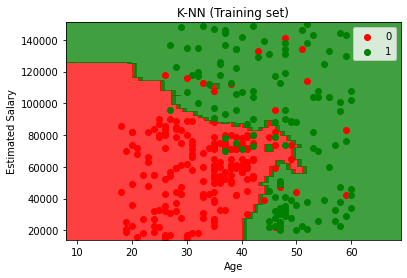

In [43]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = ss.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, knn.predict(ss.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


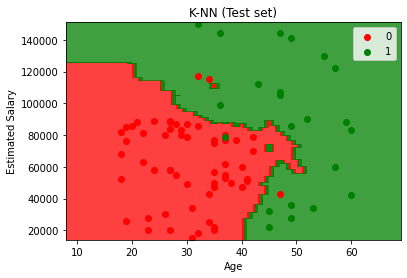

In [44]:
# Visualising the Test set results
from matplotlib.colors import ListedColormap
X_set, y_set = ss.inverse_transform(x_test), y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, knn.predict(ss.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

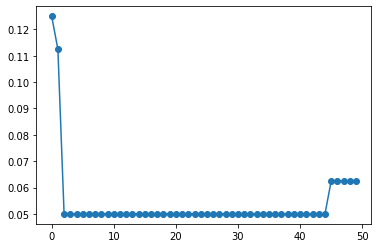

In [48]:
#Error for different values of k
import sklearn.metrics as metrics
k_range = list(range(1, 51))
scores = []
for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    scores.append(metrics.mean_squared_error(y_test, y_pred))
import matplotlib.pyplot as plt
plt.plot(scores,marker='o')
plt.show()

In [49]:
#error
from sklearn.metrics import mean_squared_error
print(mean_squared_error(y_test,y_pred))

0.0625
